In [1]:
import pandas as pd
data = pd.read_csv("data/bostonhousing.csv")

In [2]:
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
y = data['medv']
x = data.drop("medv",axis=1)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=23)

In [14]:
x_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
112,0.12329,0.0,10.01,0,0.547,5.913,92.9,2.3534,6,432,17.8,394.95,16.21
301,0.03537,34.0,6.09,0,0.433,6.590,40.4,5.4917,7,329,16.1,395.75,9.50
401,14.23620,0.0,18.10,0,0.693,6.343,100.0,1.5741,24,666,20.2,396.90,20.32
177,0.05425,0.0,4.05,0,0.510,6.315,73.4,3.3175,5,296,16.6,395.60,6.29
69,0.12816,12.5,6.07,0,0.409,5.885,33.0,6.4980,4,345,18.9,396.90,8.79


In [22]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
knr = KNeighborsRegressor(n_neighbors=4,weights="distance")
knr.fit(x_train,y_train)
y_pred = knr.predict(x_test)
mean_squared_error(y_test,y_pred)

43.11097182880768

In [25]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
knr = KNeighborsRegressor(n_neighbors=4,weights="uniform")
knr.fit(x_train,y_train)
y_pred = knr.predict(x_test)
mean_squared_error(y_test,y_pred)

44.80862204724409

In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
knr = KNeighborsRegressor(n_neighbors=5)
knr.fit(x_train,y_train)
y_pred = knr.predict(x_test)
mean_squared_error(y_test,y_pred)

45.59168503937007

In [20]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(x_train,y_train)
y_pred = knr.predict(x_test)
mean_squared_error(y_test,y_pred)

49.162388451443576

In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
knr = KNeighborsRegressor(n_neighbors=7)
knr.fit(x_train,y_train)
y_pred = knr.predict(x_test)
mean_squared_error(y_test,y_pred)

50.20116663988429

In [30]:
d ={}
d_train ={}
for i in range(4,12,2):
    knr = KNeighborsRegressor(n_neighbors=i)
    knr.fit(x_train,y_train)
    y_tr = knr.predict(x_train)
    d_train[i] = mean_squared_error(y_train,y_tr)
    y_pred= knr.predict(x_test)
    d[i] = mean_squared_error(y_test,y_pred)
d
    

{4: 44.80862204724409,
 6: 48.25076771653545,
 8: 50.09510703740159,
 10: 46.7091661417323}

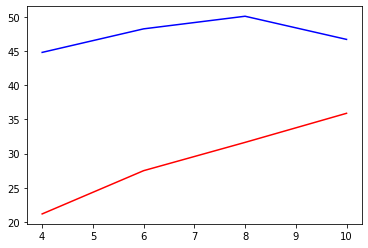

In [32]:
import matplotlib.pyplot as plt
plt.plot(list(d.keys()),list(d.values()),'b')
plt.plot(list(d_train.keys()),list(d_train.values()),'r')

In [42]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsRegressor()
grid = GridSearchCV(knn,param_grid={"n_neighbors":range(2,10),"weights":['uniform','distance']},\
                    scoring=mse,cv=4)
grid.fit(x_train,y_train)

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(2, 10), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)

In [38]:
from sklearn.metrics import make_scorer
help(make_scorer)

Help on function make_scorer in module sklearn.metrics.scorer:

make_scorer(score_func, greater_is_better=True, needs_proba=False, needs_threshold=False, **kwargs)
    Make a scorer from a performance metric or loss function.
    
    This factory function wraps scoring functions for use in GridSearchCV
    and cross_val_score. It takes a score function, such as ``accuracy_score``,
    ``mean_squared_error``, ``adjusted_rand_index`` or ``average_precision``
    and returns a callable that scores an estimator's output.
    
    Read more in the :ref:`User Guide <scoring>`.
    
    Parameters
    ----------
    score_func : callable,
        Score function (or loss function) with signature
        ``score_func(y, y_pred, **kwargs)``.
    
    greater_is_better : boolean, default=True
        Whether score_func is a score function (default), meaning high is good,
        or a loss function, meaning low is good. In the latter case, the
        scorer object will sign-flip the outcome of t

In [40]:
mse =make_scorer(mean_squared_error,greater_is_better=False)

In [43]:
grid.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=7, p=2,
          weights='distance')

In [44]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, scoring=None, fit_params=None, n_jobs=None, iid='warn', refit=True, cv='warn', verbose=0, pre_dispatch='2*n_jobs', error_score='raise-deprecating', return_train_score='warn')
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "predict", "predict_proba", "decision_function",
 |  "transform" and "inverse_transform" if they are implemented in the
 |  estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object.
 |      This is assumed to implement the scikit-learn estimator 

In [45]:
grid.cv_results_

C:\Users\Krish\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Krish\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Krish\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args

{'mean_fit_time': array([0.00349933, 0.0030809 , 0.0034762 , 0.00298095, 0.00349629,
        0.00291425, 0.00256431, 0.00206804, 0.00300169, 0.00445926,
        0.0047586 , 0.00525385, 0.00437462, 0.00541055, 0.00524491,
        0.00251883]),
 'std_fit_time': array([0.0006023 , 0.00061996, 0.00044959, 0.00159194, 0.00086965,
        0.00013439, 0.00057809, 0.00012761, 0.00037721, 0.00112726,
        0.00128462, 0.00040246, 0.00034499, 0.001439  , 0.00204068,
        0.00093289]),
 'mean_score_time': array([0.00253594, 0.0030064 , 0.00284076, 0.00251621, 0.00268   ,
        0.00199449, 0.00225985, 0.00221908, 0.00270134, 0.00373709,
        0.00398207, 0.003506  , 0.00390267, 0.00448793, 0.00504822,
        0.00248814]),
 'std_score_time': array([4.93536263e-04, 7.14449515e-04, 8.58396833e-04, 6.06541724e-04,
        4.53068118e-04, 1.96565238e-05, 4.02336756e-04, 4.48011841e-04,
        5.94368776e-04, 4.31383007e-04, 7.00889170e-04, 4.82968588e-04,
        1.48419826e-04, 8.65009226e-

In [47]:
y_pred = grid.predict(x_test)

In [48]:
mean_squared_error(y_pred,y_test)

45.029441272401336

### Pipeline

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
estimators = [("scaler",MinMaxScaler()),("knn",KNeighborsRegressor())]
pipe = Pipeline(estimators)
pipe.fit(x_train,y_train)

C:\Users\Krish\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('knn', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'))])

In [52]:
y_pred = pipe.predict(x_test)

In [53]:
mean_squared_error(y_pred,y_test)

16.733691338582673